## Heart Disease Prediction

Using machine learning to predict heart disease, and later on creating a system for healthcare professionals who can update the patient's parameters. The model will run again on the updated patient's data and alert if there is a risk of heart disease for the new updated values.

This is unique because a patient may do tests for some other health issue, but if their updated parameters indicate heart disease risk, this system will identify it, that is, it will be identified early rather than it be going unnoticed.

And the notification will be sent to the Family Doctor as well as the hospital staff, it will look like :-

<div> <img src="image.jpg" alt="Drawing" style="height: 400px;"/></div> 



In [1]:
#Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read Dataset
data_original = pd.read_csv('heart.csv')
df = data_original.copy()

In [3]:
#Overview of Data
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
#Summary Statistics of Data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Data Cleaning

In [6]:
#Checking for null data

df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#Checking for duplicate data
df.duplicated().sum()

0

In [8]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

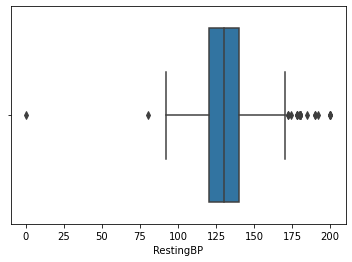

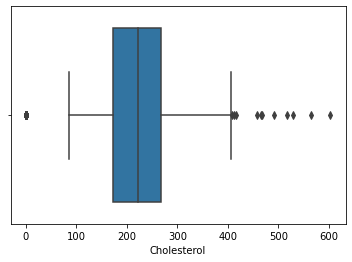

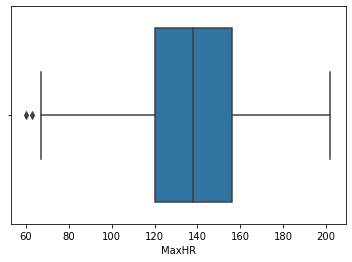

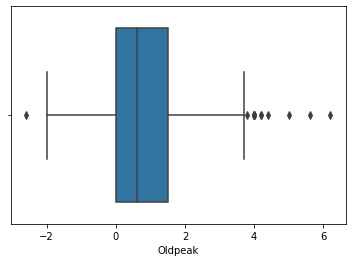

In [9]:
#Checking for outliers using Boxplots
count = 1

columns_text = ['Age','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope', 'HeartDisease', 'FastingBS']

for column in df.drop(columns_text, axis = 1):
    fig = plt.figure(figsize = (6,4))
    sns.boxplot(x = df[column], hue = df.HeartDisease)
    if count == 1: 
        count += 1
    else:
        count == 1

We see some outliers, we need to remove them. We will use the IQR (Inter Quartile Range)

IQR = Q3 - Q1

In [10]:
#We will use Quantile based flooring and capping with 10% percentile as flooring and 90% percentile as capping

outlier_columns = ['RestingBP','Oldpeak', 'MaxHR', 'Cholesterol']

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
tenth_percentile = df.quantile(0.1)
ninety_percentile = df.quantile(0.9)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
(df == 0).sum(axis = 0)

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease      410
dtype: int64

In [12]:
# We will delete all the data with outliers because replacing them will result in inaccurate calculations, 
#and we can't take that risk in health scenario

for x in outlier_columns:
    df = df[(df[x] > lower_bound[x]) & (df[x] < upper_bound[x])]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             690 non-null    int64  
 1   Sex             690 non-null    object 
 2   ChestPainType   690 non-null    object 
 3   RestingBP       690 non-null    int64  
 4   Cholesterol     690 non-null    int64  
 5   FastingBS       690 non-null    int64  
 6   RestingECG      690 non-null    object 
 7   MaxHR           690 non-null    int64  
 8   ExerciseAngina  690 non-null    object 
 9   Oldpeak         690 non-null    float64
 10  ST_Slope        690 non-null    object 
 11  HeartDisease    690 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 70.1+ KB


In [14]:
#Replacing Categorical columns

# Select categorical variables

categ = df.select_dtypes(include=object).columns

# One hot encoding
df = pd.get_dummies(df, columns=categ, drop_first= False)  
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [15]:
df = df.drop(columns = ['Sex_F', 'ChestPainType_ASY', 'RestingECG_Normal','ExerciseAngina_N', 'ST_Slope_Down'])

In [16]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,0,0,1


## Machine Learning

In [17]:
# Splitting Data into Training and Test Dataset

from sklearn.model_selection import train_test_split
y = df['HeartDisease']
X = df.drop(columns = 'HeartDisease')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.8744
F1 Score:  0.8687


### K-Nearest Neighbour

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# First model
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.657
F1 Score:  0.6537


### SVM

In [20]:
from sklearn.svm import SVC

# First model
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.686
F1 Score:  0.6286


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.7778
F1 Score:  0.7629


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# First model
RF = RandomForestClassifier(random_state=42, n_estimators=100)
                            
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.8937
F1 Score:  0.8932


# Creating the system

<AxesSubplot:>

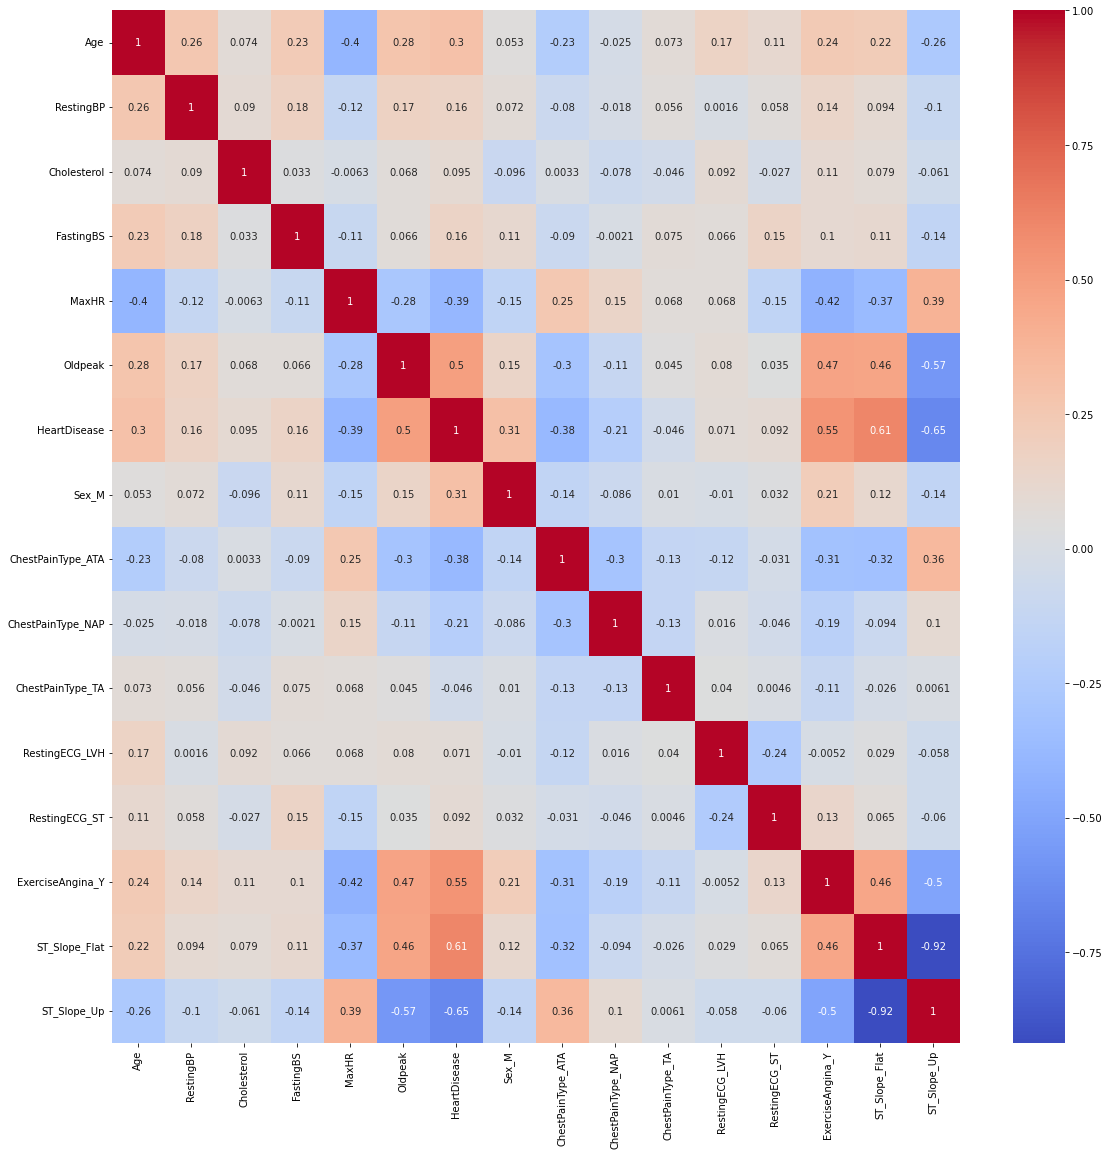

In [23]:
import seaborn
corr_matrix = df.corr(method ='pearson')
plt.figure(figsize=(19,19))
seaborn.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

In [24]:
print(corr_matrix["HeartDisease"].sort_values(ascending=False))

HeartDisease         1.000000
ST_Slope_Flat        0.606988
ExerciseAngina_Y     0.546508
Oldpeak              0.497305
Sex_M                0.306398
Age                  0.296671
FastingBS            0.159651
RestingBP            0.156221
Cholesterol          0.095002
RestingECG_ST        0.092360
RestingECG_LVH       0.070609
ChestPainType_TA    -0.045612
ChestPainType_NAP   -0.209890
ChestPainType_ATA   -0.378654
MaxHR               -0.392937
ST_Slope_Up         -0.645275
Name: HeartDisease, dtype: float64


## Creating notification system

In [25]:
'''Using the App Pushbullet which will be given to Family Doctors as well as the hospital staff. It will send out a 
notification if the patient is at heart risk'''

from pushbullet import PushBullet
from pywebio.session import *
import time


'''It is not advised to directly paste the access token on code, therefore I have pasted that in a text 
file and now I am reading the text file for it'''


with open('access_token.txt') as f:
    token = f.readlines()

access_token = str(token[0])

def notification(patient_ID):
    text = 'Patient ID '+ patient_ID + ' has a risk of heart disease, kindly check and take appropriate measures'
    
    pb = PushBullet(access_token)
    push = pb.push_note('Alert', text)

## Creating system to take values

In [26]:
#Importing libraries

import csv
from IPython.display import clear_output
import os
import numpy as np


def update_values(value,index, update, patient_data, given_ID, dummy_col):
    for x in dummy_col:
        patient_data.loc[index,x] = 0
    
    patient_data.loc[index,update] = value
    display(patient_data.loc[patient_data['PatientID'] == given_ID])
    updated_values = (patient_data.loc[patient_data['PatientID'] == given_ID])
    updated_values = updated_values.drop('PatientID', 1)
    patient_data.to_csv('patient_data.csv', index = False)
    done = 1
    param = 1
    
    return updated_values, done



#Function to update the patient records

def update_patient(given_ID):
    count = 0 #Given ID in patient_data
    param = 0
    done = 0 #Values updated
    patient_data = pd.read_csv('patient_data.csv')
    for x in patient_data['PatientID']:
        if x == given_ID:
            print('\nPatient ID Found')
            display(patient_data.loc[patient_data['PatientID'] == given_ID])
            index = patient_data.index[patient_data['PatientID'] == given_ID]
            count = 1
            while param == 0:
                update = input('Please enter the parameter to update - ')
                if update in patient_data.columns:
                    dummy_chest = ['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']
                    dummy_ECG = ['RestingECG_LVH','RestingECG_ST']
                    dummy_Angina = ['ExerciseAngina_Y']
                    dummy_slope = ['ST_Slope_Flat', 'ST_Slope_Up']
                    
                   
                    value = input('Enter value to update - ')
                    if update in dummy_chest:
                        updated_values, done = update_values(value,index, update, patient_data, given_ID, dummy_chest)
                        param = 1
                        return updated_values, done
                    elif update in dummy_ECG:
                        updated_values, done = update_values(value,index, update, patient_data, given_ID, dummy_ECG)
                        param = 1
                        return updated_values, done
                    elif update in dummy_Angina:
                        updated_values, done = update_values(value,index, update, patient_data, given_ID, dummy_Angina)
                        param = 1
                        return updated_values, done
                    elif update in dummy_slope:
                        updated_values, done = update_values(value,index, update, patient_data, given_ID, dummy_slope)
                        param = 1
                        return updated_values, done
                    else:
                        patient_data.loc[index,update] = value
                        display(patient_data.loc[patient_data['PatientID'] == given_ID])
                        updated_values = (patient_data.loc[patient_data['PatientID'] == given_ID])
                        updated_values = updated_values.drop('PatientID', 1)
                        done = 1
                        param = 1
                        patient_data.to_csv('patient_data.csv', index = False)
                        return updated_values, done
                        
                else:
                    print('Parameter not found')
            break
    
    if count == 0:
        print('Patient ID not found')
    
    return None, done
        


####################################################################
#Main Function

login = False

while login == False:
    os.system('cls')
    data = []
    with open('login.csv') as csvfile:
        reader = csv.reader(csvfile)
        for x in reader:
            data.append(x)
    
    staff_name = input('\nPlease enter your username : ')
    staff_pass = input('Please enter your password: ')

    sname = [x[0] for x in data]
    spass = [x[1] for x in data]

    countInc = 0 #Just for printing else at last
    if staff_name in sname:
        for i in range(0,len(staff_name)-1):
            if sname[i] == staff_name and spass[i] == staff_pass:
                print('\nYou are logged in')
                login = True
                patient_ID = input('\nEnter patient ID to update the record - ')
                updated_values, done = update_patient(patient_ID)
                countInc = 1
                
                if done == 1:
                    listt = updated_values.values.tolist()
                    B = np.reshape(listt, (-1, 15))
                    listtt = B.tolist()

                    output = RF.predict(listtt)
                    if output[0] == 1:
                        print('\n\nALERT! Risk of heart disease, please consult your doctor')
                        
                        #Code to send push notifications
                        
                        notification(patient_ID)
                        
                    else:
                        print('\nValues updated, no significant chance of heart disease')
                break
            else:
                #clear_output(wait=True)
                print('\nIncorrect username or password, please try again')
                countInc = 1
                break

else:
    #clear_output(wait=True)
    if countInc != 1:
        print('\nIIncorrect username or password, please try again')


Please enter your username : smk
Please enter your password: 1234

You are logged in

Enter patient ID to update the record - a0008

Patient ID Found


,PatientID,Age,Sex_M,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
7,a0008,25,1,150,350,0,122,0.0,1,0,0,1,0,1,1,0


Please enter the parameter to update - Cholesterol
Enter value to update - 250


,PatientID,Age,Sex_M,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
7,a0008,25,1,150,250,0,122,0.0,1,0,0,1,0,1,1,0


C:\Users\saadm\AppData\Local\Temp/ipykernel_14048/3948288929.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  updated_values = updated_values.drop('PatientID', 1)




ALERT! Risk of heart disease, please consult your doctor
